In [1]:
import pandas as pd
DATADIR = "D:/Documents/UFMG/PIC/RedesNeurais/kaggle_dataset/diabetic-retinopathy-classified/diabetic-retinopathy-customized/trainLabels.csv"

trainLabels = pd.read_csv(DATADIR)
trainLabels.head()


,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [2]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np

# resize the image to (256, 256)
img_rows, img_cols = 200, 200

listing = os.listdir("D:/Documents/UFMG/PIC/RedesNeurais/kaggle_dataset/diabetic-retinopathy-classified/diabetic-retinopathy-customized/resized_train_cropped/resized_train_cropped/binary/dataset_dividido") 
'''listing.remove("trainLabels.csv")'''

immatrix = []
imlabel = []


listing


Using TensorFlow backend.


['1000_left.jpeg',
 '1000_right.jpeg',
 '10017_left.jpeg',
 '10017_right.jpeg',
 '1002_left.jpeg',
 '1002_right.jpeg',
 '10030_left.jpeg',
 '10030_right.jpeg',
 '10047_left.jpeg',
 '10047_right.jpeg',
 '10085_left.jpeg',
 '10085_right.jpeg',
 '1008_left.jpeg',
 '1008_right.jpeg',
 '1011_left.jpeg',
 '1011_right.jpeg',
 '10125_left.jpeg',
 '10125_right.jpeg',
 '1012_left.jpeg',
 '1012_right.jpeg',
 '10150_right.jpeg',
 '10153_left.jpeg',
 '10153_right.jpeg',
 '10159_right.jpeg',
 '10169_right.jpeg',
 '10177_left.jpeg',
 '10177_right.jpeg',
 '1017_left.jpeg',
 '1017_right.jpeg',
 '10193_right.jpeg',
 '1020_left.jpeg',
 '1020_right.jpeg',
 '1021_left.jpeg',
 '1021_right.jpeg',
 '10220_left.jpeg',
 '10221_right.jpeg',
 '10232_right.jpeg',
 '10233_left.jpeg',
 '10233_right.jpeg',
 '10234_left.jpeg',
 '10234_right.jpeg',
 '1024_left.jpeg',
 '1024_right.jpeg',
 '10269_left.jpeg',
 '1027_left.jpeg',
 '1027_right.jpeg',
 '10297_right.jpeg',
 '1029_left.jpeg',
 '1029_right.jpeg',
 '1030_left.jpe

In [3]:

for file in listing:
    base = os.path.basename("D:/Documents/UFMG/PIC/RedesNeurais/kaggle_dataset/diabetic-retinopathy-classified/diabetic-retinopathy-customized/resized_train_cropped/resized_train_cropped/binary/dataset_dividido/" + file)
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open("D:/Documents/UFMG/PIC/RedesNeurais/kaggle_dataset/diabetic-retinopathy-classified/diabetic-retinopathy-customized/resized_train_cropped/resized_train_cropped/binary/dataset_dividido/" + file)
    img = np.array(im.resize((img_rows,img_cols)))
    
    # convert to green channel only
    img[:,:,[0]] = 0
    immatrix.append(img)
    length = len(immatrix)
    if(length % 1000 == 0):
        print(length)


'''import matplotlib.pyplot as plt 
plt.imshow(img)
img'''

1000
2000
3000
4000
5000


'import matplotlib.pyplot as plt \nplt.imshow(img)\nimg'

level: 0


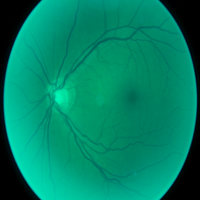

In [4]:
im = Image.fromarray(immatrix[1],'RGB')
print("level:",imlabel[1])
im

In [5]:
import random

# define transformation methods
def horizontal_flip(image_array):
    return image_array[:, ::-1]

def vertical_flip(image_array):
    return image_array[::-1,:]

def random_transform(image_array):
    if random.random() < 0.5:
        return vertical_flip(image_array)
    else:
        return horizontal_flip(image_array)

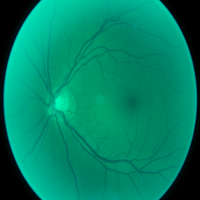

In [6]:
im = Image.fromarray(vertical_flip(immatrix[1]),'RGB')
im

In [7]:
length = len(immatrix)
for i in range(length):
    immatrix.append(horizontal_flip(immatrix[i]))
    imlabel.append(imlabel[i])
    immatrix.append(vertical_flip(immatrix[i]))
    imlabel.append(imlabel[i])
        
print("Size of image array before augmentation: ", length)
print("Size fo image array after augmentation: ", len(immatrix))

Size of image array before augmentation:  5664
Size fo image array after augmentation:  16992


In [8]:
from sklearn.utils import shuffle

'''data,label = shuffle(immatrix, imlabel, random_state=42)'''
train_data = [immatrix,imlabel]

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size = 0.1, random_state = 42)

print(np.array(x_train).shape)
print(np.array(y_train).shape)

(15292, 200, 200, 3)
(15292,)


In [10]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(np.array(y_train), 2)
y_test = np_utils.to_categorical(np.array(y_test), 2)

x_train = np.array(x_train).astype("float32")/255.
x_test = np.array(x_test).astype("float32")/255.

print(np.array(y_train).shape)

(15292, 2)


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train[0].shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(activation='softmax', units=2))

model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 198, 198, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)       

In [ ]:
model.fit(x_train, y_train, batch_size = 64, epochs=5, shuffle=True, verbose=1)


Epoch 1/5
 7744/15292 [==============>...............] - ETA: 6:22 - loss: 0.6927 - accuracy: 0.5096

In [ ]:
predictions = model.predict(x_test)
predictions

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)